In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

In [11]:
data = pd.read_csv("/content/gdrive/My Drive/project data/house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
data['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


<function seaborn.utils.despine>

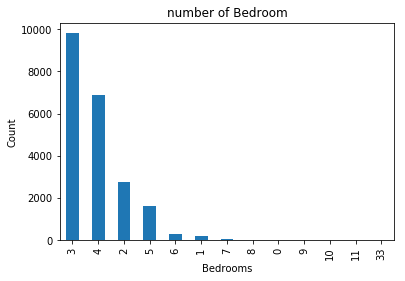

In [15]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

In [22]:
rooms=data[(data['bedrooms']>10)]
rooms

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [24]:
rooms1=data[(data['bedrooms']>10) & (data['bathrooms']>2)]
rooms1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000.0,11,3.0,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960


In [33]:
room2=data['bedrooms'].value_counts()
room2.value_counts()

13      2
1       2
3       1
6       1
2760    1
199     1
38      1
272     1
6882    1
1601    1
9824    1
Name: bedrooms, dtype: int64

In [34]:
rooms.value_counts()

AttributeError: ignored

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

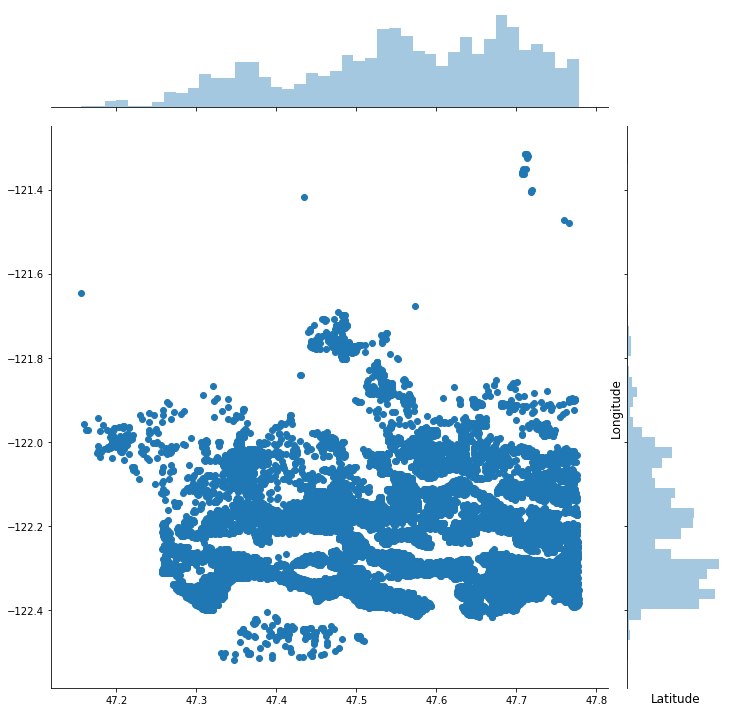

TypeError: ignored

In [35]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
plt1 = plt()
sns.despine

Text(0.5, 1.0, 'Price vs Square Feet')

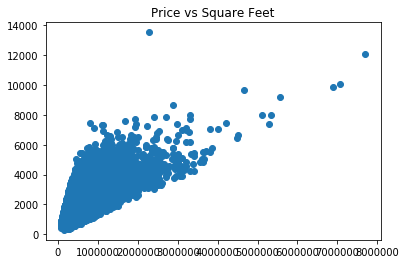

In [36]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Location of the area')

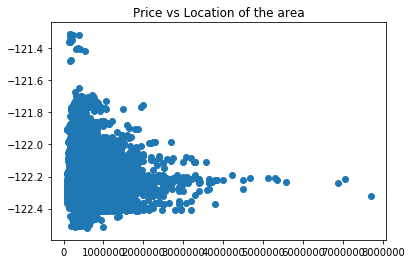

In [37]:
plt.scatter(data.price,data.long)
plt.title("Price vs Location of the area")

Text(0.5, 1.0, 'Latitude vs Price')

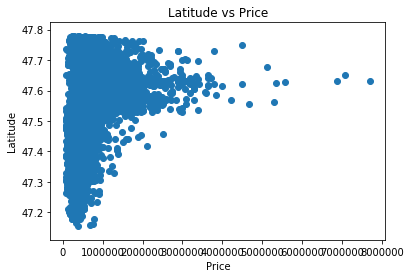

In [39]:
plt.scatter(data.price,data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

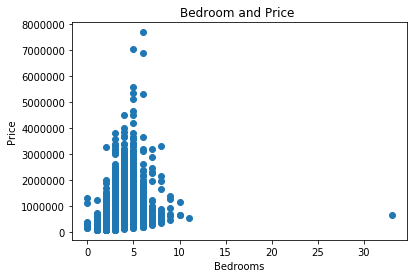

<function seaborn.utils.despine>

In [40]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

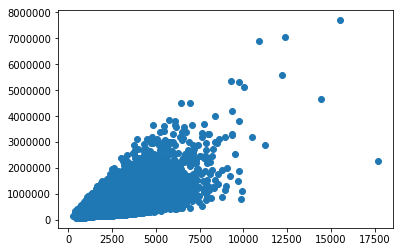

In [41]:
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

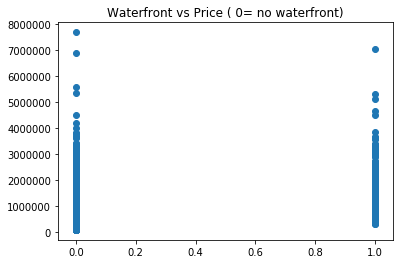

In [42]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

In [0]:
data1=data.copy()

In [44]:
train1 = data1.drop(['id', 'price'],axis=1)
train1.head(2)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


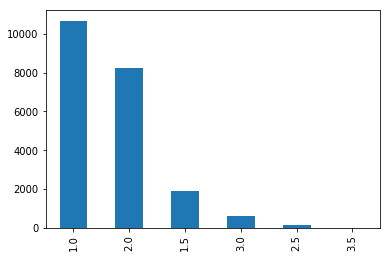

In [45]:
data.floors.value_counts().plot(kind='bar')

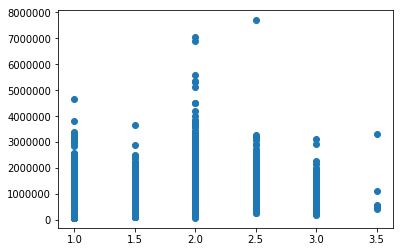

In [46]:
plt.scatter(data.floors,data.price)

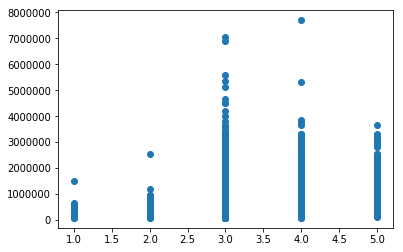

In [47]:
plt.scatter(data.condition,data.price)

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

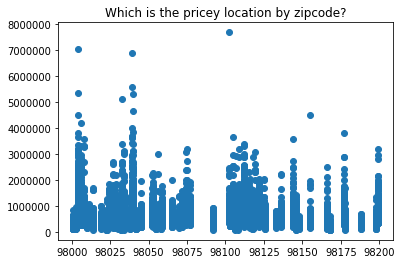

In [48]:
plt.scatter(data.zipcode,data.price)
plt.title("Which is the pricey location by zipcode?")

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
reg = LinearRegression()

In [0]:
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'],axis=1)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [57]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
reg.score(x_train,y_train)

0.6957018864431708

In [60]:
reg.coef_

array([ 0.00000000e+00, -3.69584689e+04,  3.99944474e+04,  1.12442724e+02,
        1.05110204e-01,  6.09005604e+03,  6.03577974e+05,  5.14093954e+04,
        2.61292108e+04,  9.39146205e+04,  7.03934446e+01,  4.20492793e+01,
       -2.56363788e+03,  1.97755242e+01, -5.81262588e+02,  6.06931004e+05,
       -2.14720057e+05,  2.18724560e+01, -3.52080103e-01])

In [62]:
reg.intercept_

6286489.366120364

In [63]:
reg.score(x_test,y_test)

0.7320342760357625

In [65]:
pred=reg.predict(x_test)
print("Predicted result price:",pred)
print("Actual Price",y_test)

Predicted result price: [ 708968.57473725 1454115.5676356   422619.27778286 ...  191420.54893188
  238056.68598463  451235.02573466]
Actual Price 6638      735000.0
7366     1150000.0
3158      350500.0
9117      860000.0
3392      122000.0
305       725000.0
14462     417000.0
6196      594950.0
10194     471000.0
13457     634950.0
8698      500000.0
18573     768000.0
6675      323000.0
4287      430000.0
3604      625000.0
7168      710000.0
16322     620000.0
11024     665000.0
527      1600000.0
17036     875000.0
12418     244900.0
12236    1305000.0
20224    1789950.0
9856      629000.0
6974      275000.0
10505     385000.0
14246     545000.0
1754     1038000.0
18229     475000.0
6761      269950.0
           ...    
13469     652000.0
15050     628000.0
4704      430000.0
6812      385000.0
19293     310000.0
6336      400000.0
3991      499900.0
4924      832500.0
10767     210000.0
20168    1750000.0
15597     624000.0
6175      560000.0
20808     334888.0
1945     2400000.0

In [66]:
from sklearn import metrics
#print result of MAE
print(metrics.mean_absolute_error(y_test,pred))
#print result of MSE
print(metrics.mean_squared_error(y_test,pred))
#print result of MSE
print(np.sqrt(metrics.mean_absolute_error(y_test,pred)))

126922.81593974313
39156588377.34842
356.2622853176338


In [0]:
from sklearn.linear_model import Lasso,Ridge

In [68]:
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359827173545603.6, tolerance: 259663067593.392
  positive)


0.6957018841250264

In [69]:
ls.coef_

array([ 0.00000000e+00, -3.69574615e+04,  3.99910551e+04,  2.84394722e+02,
        1.05069378e-01,  6.08893324e+03,  6.03424122e+05,  5.14144707e+04,
        2.61257165e+04,  9.39173563e+04, -1.01557852e+02, -1.29897332e+02,
       -2.56376718e+03,  1.97764269e+01, -5.81123958e+02,  6.06866357e+05,
       -2.14630321e+05,  2.18694334e+01, -3.52125542e-01])

In [70]:
ls.intercept_

6287189.90917986

In [71]:
rs=Ridge()
rs.fit(x_train,y_train)
rs.score(x_train,y_train)

0.6957001872539408

In [72]:
rs.coef_

array([ 0.00000000e+00, -3.69909909e+04,  3.99962153e+04,  1.12464003e+02,
        1.04325585e-01,  6.17273007e+03,  5.98571704e+05,  5.16050538e+04,
        2.61086118e+04,  9.39811217e+04,  7.03521241e+01,  4.21098056e+01,
       -2.56703213e+03,  1.97964257e+01, -5.79068862e+02,  6.04945213e+05,
       -2.13634741e+05,  2.18384273e+01, -3.52542800e-01])

In [73]:
rs.intercept_

6304738.110282111